# <t><center>Assignment 4 - Exploratory Data Analysis</t>

### Data

COVID 19 Reported Patient Impact and Hospital Capacity - https://healthdata.gov/Hospital/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/anag-cw7u

This dataset provides facility level data for hospitalization aggregated on a weekly basis. Inlcudes information on weekly hospital capacity and useage (staffed general and ICU beds), inlcuding how much of that is being used by confirmed COVID-19 patients.

Data were downloaded using data portal tools to limit the file size. Data were filtered to only include facilities within California.

### EDA

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import geopandas as gpd
import folium

In [ ]:
df = pd.read_csv('COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_Facility.csv')

In [ ]:
list(df.columns)

In [ ]:
# this cell is to remove the columns that are not needed.
cols = ['hospital_pk',
        'collection_week',
        'state',
        'ccn',
        'hospital_name',
        'address',
        'city',
        'zip',
        'hospital_subtype',
        'fips_code',
        'is_metro_micro',
        'geocoded_hospital_address',
        'hhs_ids',
        ]

for col in list(df.columns):
    if (col not in cols) and ('7_day_avg' in col) and ('pediatric' not in col) and ('influenza' not in col):
                    cols.append(col)

df = df[cols]

In [ ]:
df.info()

In [ ]:
# In the data documentation in notes that the data should be an aggregate of 7 days, reported every Friday. 
# Here I check to ensure that the data is being reported only on fridays.
df['collection_week'] = pd.to_datetime(df['collection_week'])
df['weekday'] = df['collection_week'].dt.day_name()
df['weekday'].unique()

In [ ]:
print('Head of dataframe: \n' )
print(df.head(5))

In [ ]:
print('Tail of dataframe: \n' )
print(df.tail(5))

In [ ]:
print('A Random sample from the dataframe: \n' )
print(df.sample())

In [ ]:
df.dtypes

In [ ]:
# In this cell I change the data types of columns that are not already the correct type.
dtypes = {
    'hospital_pk' : 'string',
    'collection_week' : 'datetime64',
    'state' : 'string',
    'ccn' : 'string',
    'hospital_name' : 'string',
    'address' : 'string',
    'city' : 'string',
    'zip' : 'string',
    'hospital_subtype' : 'string',
    'fips_code' : 'string',
    'is_metro_micro' : 'bool',
    'geocoded_hospital_address' : 'object',
    'hhs_ids' : 'string',
    'total_beds_7_day_avg' : 'float64',
    'all_adult_hospital_beds_7_day_avg':'float64',
    'all_adult_hospital_inpatient_beds_7_day_avg':'float64',
    'inpatient_beds_used_7_day_avg':'float64',
    'all_adult_hospital_inpatient_bed_occupied_7_day_avg':'float64',
    'inpatient_beds_used_covid_7_day_avg':'float64',
    'total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg':'float64',
    'total_adult_patients_hospitalized_confirmed_covid_7_day_avg':'float64',
    'inpatient_beds_7_day_avg':'float64',
    'total_icu_beds_7_day_avg':'float64',
    'total_staffed_adult_icu_beds_7_day_avg':'float64',
    'icu_beds_used_7_day_avg':'float64',
    'staffed_adult_icu_bed_occupancy_7_day_avg':'float64',
    'staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_avg':'float64',
    'staffed_icu_adult_patients_confirmed_covid_7_day_avg':'float64',
    }

df.astype(dtypes).dtypes

In [ ]:
df.describe()

In [ ]:
print(len(df))
df = df.dropna()
print(len(df))

In [ ]:
df.describe()

In [ ]:
# Changes all values below 0 to 0.
for k, v in dtypes.items():
    if v == 'float64':
        mask = df[k] < 0
        df.loc[mask, k] = 0

In [ ]:
df.describe()

In [37]:
ot_group = df.groupby(['city','collection_week'])[['inpatient_beds_used_7_day_avg','inpatient_beds_used_covid_7_day_avg']].mean()
city_group = df.groupby('city')[['inpatient_beds_used_7_day_avg','inpatient_beds_used_covid_7_day_avg']].mean()

In [40]:
ot_group.reset_index(inplace=True)
city_group.reset_index(inplace=True)

In [55]:
g200 = city_group.loc[city_group['inpatient_beds_used_7_day_avg'] > 200]

C:\Users\chief\AppData\Local\Temp\ipykernel_13432\922471937.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(g200['city'], rotation=90)


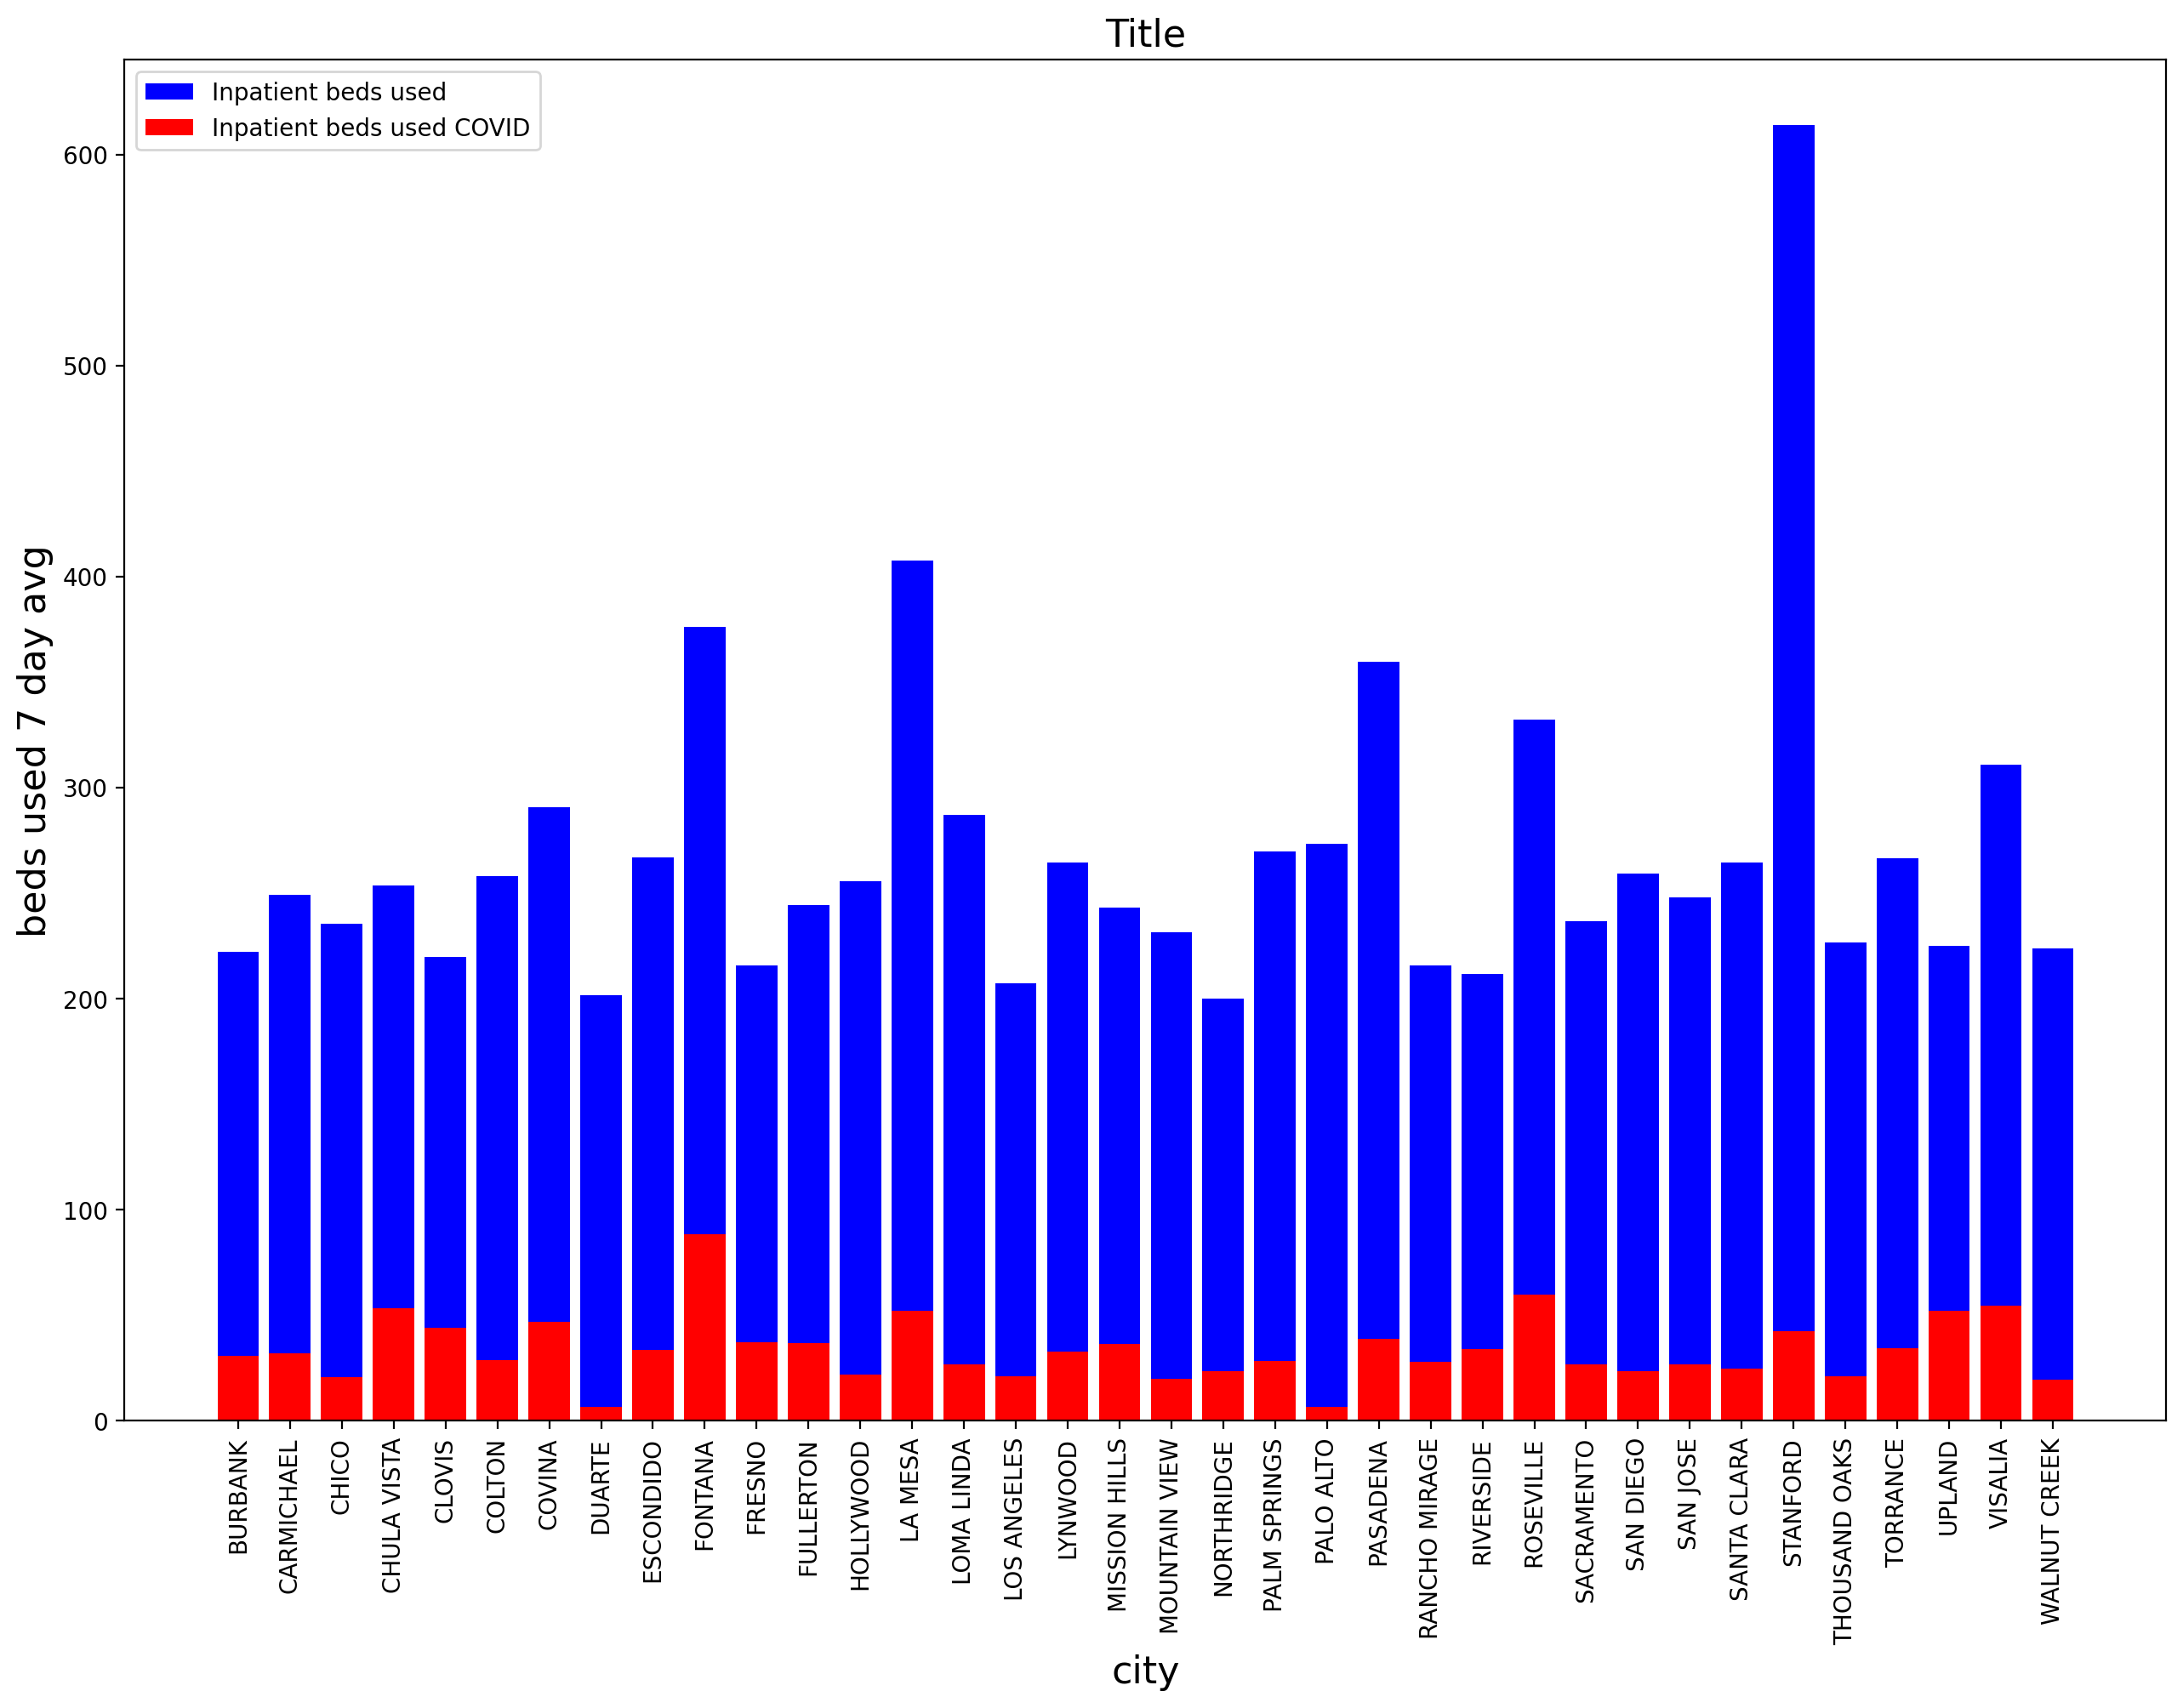

In [72]:
fig = plt.figure(dpi=200)
ax = fig.add_axes([0, 0, 2, 2])
ax.bar(g200['city'], g200['inpatient_beds_used_7_day_avg'], color='b')
ax.bar(g200['city'], g200['inpatient_beds_used_covid_7_day_avg'], color='r')
ax.set_title('Title', fontsize=16)
ax.xaxis.set_label_text('city', fontsize=16)
ax.set_xticklabels(g200['city'], rotation=90)
ax.yaxis.set_label_text('beds used 7 day avg', fontsize=16)
ax.legend(['Inpatient beds used', 'Inpatient beds used COVID'])

In [58]:
df['covid_use_pct'] = df['inpatient_beds_used_covid_7_day_avg'] / df['inpatient_beds_used_7_day_avg']

In [59]:
city_group = df.groupby('city')[['covid_use_pct']].mean()

In [61]:
city_group.describe()

,covid_use_pct
count,224.000000
mean,0.108327
std,0.063044
min,0.000000
25%,0.068830
50%,0.112015
75%,0.148454
max,0.312981


In [121]:
gbo = df.groupby('city')['inpatient_beds_used_covid_7_day_avg'].mean()

In [122]:
gbo = gbo.to_frame()

In [123]:
gbo.reset_index(inplace=True)

In [133]:
gbo[gbo['inpatient_beds_used_covid_7_day_avg'] == gbo['inpatient_beds_used_covid_7_day_avg'].max()]['city']

51    FONTANA
Name: city, dtype: object

In [137]:
fontana = df[df['city'] == 'FONTANA']

(array([18444., 18536., 18628., 18718., 18809., 18901., 18993., 19083.,
        19174.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

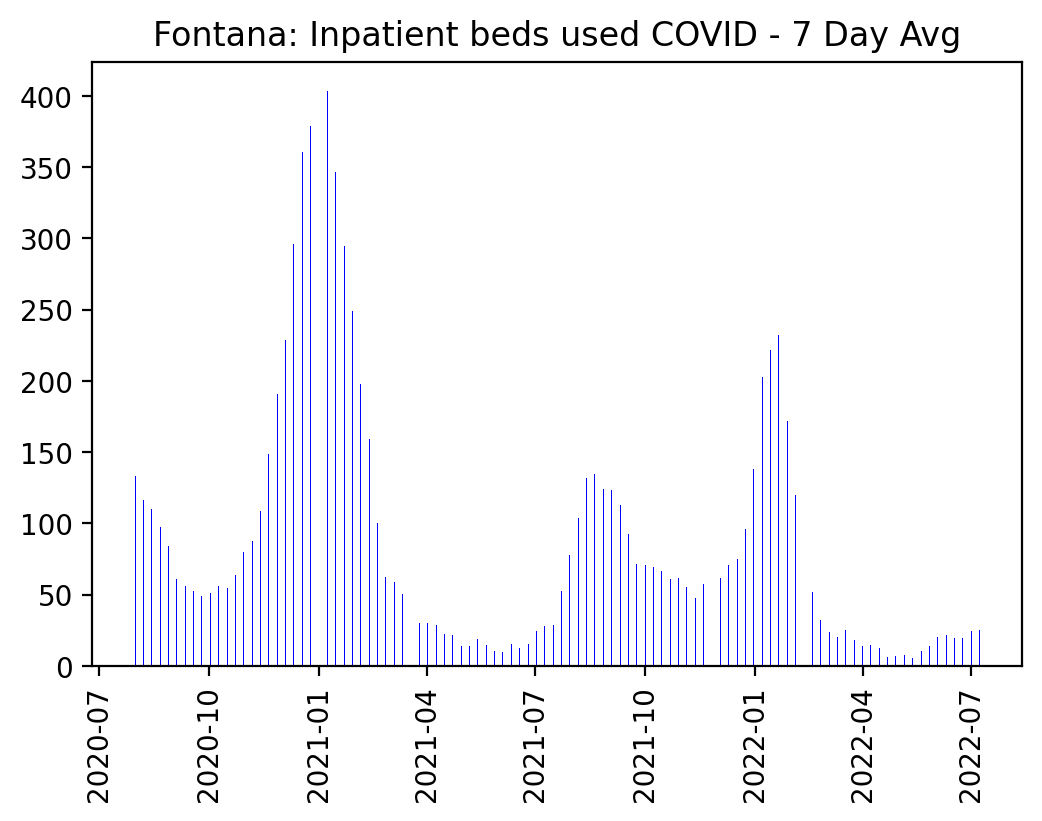

In [145]:
plt.figure(dpi=200)
plt.bar(fontana['collection_week'], fontana['inpatient_beds_used_covid_7_day_avg'], color='b')
plt.title('Fontana: Inpatient beds used COVID - 7 Day Avg')
plt.xticks(rotation=90)

### Questions

1. What cities had the most capacity.

2. Were there similar times when capacity was low or high across the state? Or does it vary more granularly accross areas?

3. Were hospitals with disproportianalty low capacity more likely to be found in disadvantaged communities?